# Westlake Realty Group Proposal

Authors: Drew Holcombe, Juan Acosta

## Overview
Our project presents data of house sale prices for King County, Washington. Using statistical analyses techniques in Python we are able to give our recomendations on which factors of a hosue are the most significant to determine price, and how Westlake Realty Group could use this information to reduce risk and increase profit.


## Business Challenge

Westlake Realty Group (hypothetical example) is looking for recomendations on factors and carateristics of a house that are the most impactful to determine its price. Our group's objective is to find factors that accurately predict the given target, driven by real world data from the housing market, and provide results and justification for them to consider on their decision making process.


## Data Understanding
Our project presents data of house sale prices for King County, Seattle, contained in the kc_house dataset. It includes houses sold between May 2014 and May 2015. The variables we found to be most useful are `price`, `bedrooms`, `bathrooms`, `sqft_living`, `floors`, `waterfront`, `view`, `condition` and `grade`.

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [294]:
df = pd.read_csv('data/kc_house_data.csv')
df.shape

(21597, 21)

We have information of 21597 houses located in King county washington.

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

`price` will be our target for the model

<br>

For our numeric columns we have `bedrooms`, `bathrooms`, `sqft_living`, `floors`, `sqft_above`, `yr_built`, `yr_renovated`, `zipcode`, `lat`, `long`, `sqft_living15` and `sqft_lot15`,
out of all numeric columns, `bedrooms`, `bathrooms`, `floors` and `zipcode` contain discrete data, we can also notice how `sqft_basement` has an object dtype, we might have to convert values if the column is needed

<br>

`waterfront`, `view`, `condition` and `grade` are categorical variables
<br>

There are null values present in `waterfront`, `view` and `yr_renovated` columns

## Data Preparation

We first clean the data, look for duplicate data points, identify noticible outliers, and droping null values 

In [296]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Our first observation is on the `sqft_basement` column, a `?` can be seen on some of the data points. 

<br>

#### `ID` column

`id` column shows the unique identifier for a house

In [297]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

Some houses appear more than once in the dataset

In [298]:
# quick search for first id in the value count
df.loc[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


Above we have 3 sale records for the same house, price is different in the three occasions, increasing over time. We can also notice how the third row shows NaN value on the `waterfront` and `yr_renovated` columns, and that same house in a different row shows 'NO' and '0.0' respectively.

We dropped duplicate values using `id` and `date` columns, keeping the most recent record of the house

In [299]:
df.drop_duplicates(subset='id', keep='last', inplace=True)

In [300]:
df.loc[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


<br>


We will drop some columns to focus mainly on `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade` and `yr_built`

In [301]:
df.drop(labels=["sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat",
                "long","sqft_living15","sqft_lot15"], axis=1, inplace=True)

<br>

<br>


Now let's look for potential mistakes in other columns; we'll define some functions for repeated use and see what we're working with.

<br>

#### `bedrooms` column

<br>


In [302]:
def hist(df, column):
    return plt.hist(x=df[column], bins='auto')
def hist_rooms(df, column):
    return plt.hist(x=df[column], bins=np.linspace(1, df[column].max()))
def extreme(df, column):
    return df.loc[df[column] == df[column].max()]

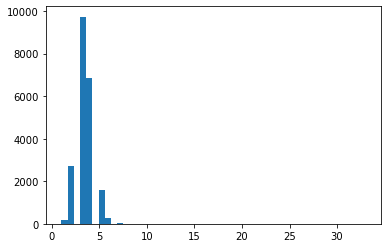

In [303]:
hist_rooms(df, "bedrooms");

In [304]:
extreme(df, "bedrooms")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1947


We found an outlier, a house with 33 bedrooms, a quick search of the house id on google is more than enough to discover this is a typo, we will replace value with 3, the correct amount of rooms.

In [305]:
df["bedrooms"].replace(to_replace=33, value=3, inplace=True)
df["bedrooms"].value_counts()

3     9732
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

There's still some suspicious numbers, albeit less egregious. Let's take a look at the 11.

In [306]:
df.loc[df["bedrooms"] == 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,NO,NONE,Average,7 Average,1918


Looking into this house, it appears this house actually has four bedrooms. Let's adjust that.

In [307]:
df["bedrooms"].replace(to_replace=11, value=4, inplace=True)

Much more reasonable - let's repeat the process of cleaning with the other columns


<br>

#### `bathrooms` column

<br>


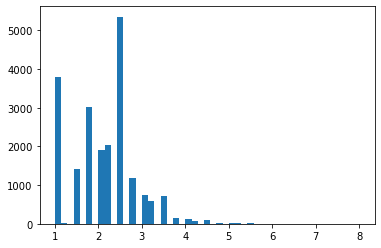

In [308]:
hist_rooms(df, "bathrooms");

In [309]:
extreme(df, "bathrooms")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,NO,GOOD,Good,13 Mansion,1910
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,1999


This is lots of bathrooms, but both houses are very large, so they're not unreasonable.


<br>


#### `sqft_living` column

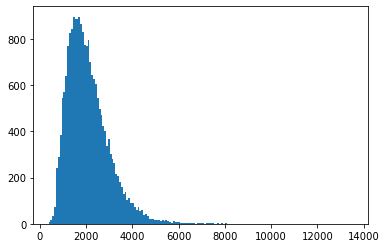

In [310]:
hist(df, "sqft_living");

In [311]:
extreme(df, "sqft_living")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,1999


Understandably, the largest house also is tied for most bathrooms, but if we take a look at the plot below, this house  can be considered an outlier, it has a large sqft living space and a low price, compared to houses similar in living space but sold for a higher price.

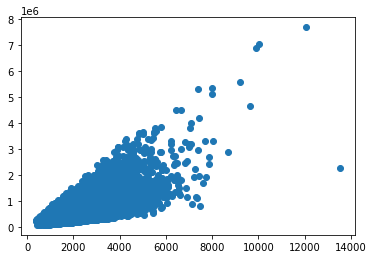

In [312]:
plt.scatter(df['sqft_living'], df['price']);

In [313]:
#dropping outlier

df.drop(12764, inplace = True)



<br>


#### `sqft_lot` column

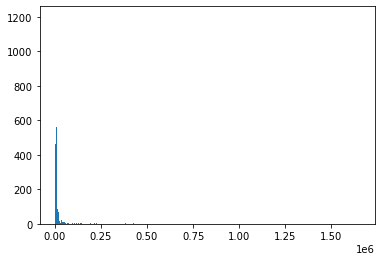

In [314]:
hist(df, "sqft_lot");

In [315]:
extreme(df, "sqft_lot")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,NO,GOOD,Good,6 Low Average,1920


In [316]:
df['sqft_lot'].max()

1651359

A search reveals this is a farm, which is unusual, but valid.


<br>

#### `waterfront` column



the column tells whether the house is on a waterfront

In [317]:
df['waterfront'].value_counts()

NO     18920
YES      146
Name: waterfront, dtype: int64

In [318]:
df['waterfront'].isnull().sum()

2353

Will change NaN values to 'NO' since, since it is the most frequent value under that column

In [319]:
df['waterfront'] = df['waterfront'].replace(np.nan, 'NO')

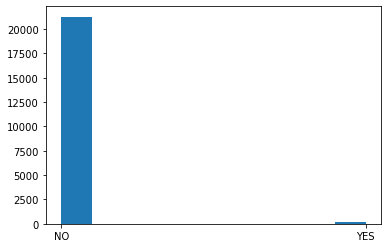

In [320]:
plt.hist(df['waterfront']);


<br>


#### `floors` column

In [321]:
df['floors'].value_counts()

1.0    10552
2.0     8203
1.5     1888
3.0      608
2.5      161
3.5        7
Name: floors, dtype: int64

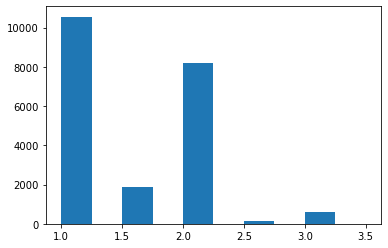

In [322]:
plt.hist(df['floors']);

In [323]:
df.loc[df['floors'] == 3.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
10066,1972202010,8/1/2014,435000.0,3,3.00,1440,1350,3.5,NO,AVERAGE,Average,8 Good,2005
11582,3180100023,1/30/2015,544000.0,3,2.50,1760,1755,3.5,NO,NONE,Average,8 Good,1998
14871,8673400177,4/2/2015,525000.0,3,3.00,1730,1074,3.5,NO,NONE,Average,8 Good,2006
15410,1702900664,4/16/2015,479000.0,2,2.50,1730,1037,3.5,NO,NONE,Average,8 Good,2008
18462,1346300150,10/20/2014,3300000.0,8,4.00,7710,11750,3.5,NO,NONE,Very Good,12 Luxury,1904
20292,1972200426,9/18/2014,525000.0,2,2.75,1310,1268,3.5,NO,NONE,Average,8 Good,2007
20756,1972200428,6/25/2014,563500.0,3,2.50,1400,1312,3.5,NO,NONE,Average,8 Good,2007


Made a search for house with 3.5 floors and only 2 bedrooms just to confirm the information is accurate, it is an apartment unit.

<br>


#### `conditions` column

<br>

The `condition` column tells us how good the overall condition of the house is, and is related to maintenance of house.

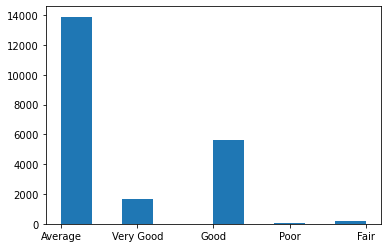

In [324]:
plt.hist(df['condition']);

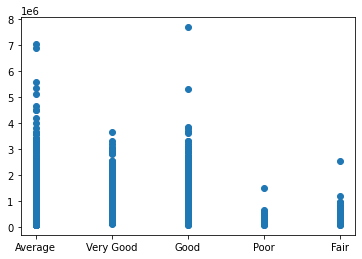

In [325]:
plt.scatter(df['condition'], df['price']);

In [326]:
dff = df.loc[df['condition'] == 'Good']
dff.loc[dff['price'] == dff['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,NO,GOOD,Good,13 Mansion,1910


<br>


#### `grade` column

<br>

The `grade` column shows the overall grade of the house, related to the construction and design of the house.

In [327]:
df['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          87
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

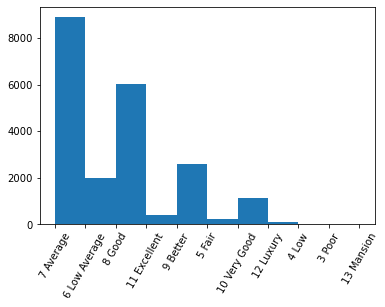

In [328]:
plt.hist(df['grade'])
plt.xticks(rotation = 60);

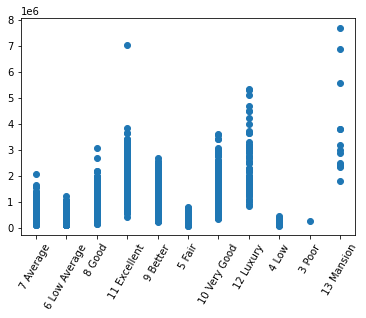

In [329]:
plt.scatter(df['grade'], df['price'])
plt.xticks(rotation = 60);

We can notice the '13 mansion'  has some outliers, '11 Excellent' shows one outlier, we will take care of these

In [330]:
Mansions = df.loc[df['grade'] == '13 Mansion']
Mansions.loc[Mansions['price'] == Mansions['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,NO,GOOD,Good,13 Mansion,1910


In [331]:
df.drop(7245, inplace = True)

In [332]:
df.drop(9245, inplace = True)

In [333]:
Excellent = df.loc[df['grade'] == '11 Excellent']
Excellent.loc[Excellent['price'] == Excellent['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,YES,AVERAGE,Average,11 Excellent,1940


In [334]:
df.drop(3910, inplace = True)

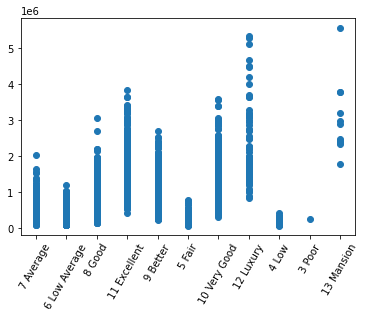

In [335]:
plt.scatter(df['grade'], df['price'])
plt.xticks(rotation = 60);

<br>


#### `yr_built` column

<br>

Year when house was built

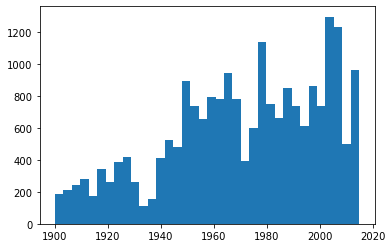

In [336]:
hist(df, "yr_built");

We have records for houses built in 1900 to 2015

<br>


#### `view` column

<br>

This column describes quality of view from house

In [337]:
df["view"].value_counts()

NONE         19253
AVERAGE        955
GOOD           504
FAIR           329
EXCELLENT      312
Name: view, dtype: int64

In [338]:
df["view"].isna().sum()

63

Column view has 63 null values, we will deal with missing values later in the process


<br>

## Data Modeling

We defined functions to help create a simple model, and a second function to create models using a log transformed target.

In [339]:
def simple_model(x):
    y = df["price"]
    x_c = sm.add_constant(x)
    return sm.OLS(endog=y, exog=x_c).fit().summary()

In [340]:
def simple_ylog_model(x):
    y = np.log(df["price"])
    x_c = sm.add_constant(x)
    return sm.OLS(endog=y, exog=x_c).fit().summary()

For the view feature, since we know we have null values in this column, we'll let those work as our missing points to prevent multicollinearity.

<br>


Created a dataframe separating each category in the view column into its own column.

In [341]:
view_dummies = pd.get_dummies(df["view"])
view_dummies

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
21592,0,0,0,0,1
21593,0,0,0,0,1
21594,0,0,0,0,1
21595,0,0,0,0,1



<br>

Lets built a simple model using view features

In [342]:
simple_model(view_dummies)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     845.1
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:56:15   Log-Likelihood:            -3.0238e+05
No. Observations:               21416   AIC:                         6.048e+05
Df Residuals:                   21410   BIC:                         6.048e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.22e+05   4.13e+04     15.054      0.000    5.41e+05    7.03e+05
AVERAGE     1.634e+05   4.27e+04      3.832      0.000    7.98e+04    2.47e+05
EXCELLENT   8.124e+05   4.53e+04     17.936      0.000    7.24e+05    9.01e+05
FAIR        1.924e+05   4.51e+04      4.267      0.000    1.04e+05    2.81e+05
GOOD        3.375e+05   4.38e+04      7.703      0.000    2.52e+05    4.23e+05
NONE       -1.236e+05   4.14e+04     -2.987      0.003   -2.05e+05   -4.25e+04
==============================================================================
Omnibus:                    14786.065   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           377751.664
Skew:                           2.986   Prob(JB):                         0.00
Kurtosis:                      22.689   Cond. No.                         61.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<br>

We can set the nulls as not having a view. As is, it appears that 'NONE' is weaker than an undocumented view (null), 
but let's take a look, by simply dropping the "NONE" column, the two will be viewed as equal by the model.

<br>


In [343]:
view_dummies2 = view_dummies.drop("NONE", axis=1)

In [344]:
simple_model(view_dummies2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:56:23   Log-Likelihood:            -3.0238e+05
No. Observations:               21416   AIC:                         6.048e+05
Df Residuals:                   21411   BIC:                         6.048e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.987e+05   2359.875    211.342      0.000    4.94e+05    5.03e+05
AVERAGE     2.867e+05   1.09e+04     26.365      0.000    2.65e+05    3.08e+05
EXCELLENT   9.356e+05   1.87e+04     49.986      0.000    8.99e+05    9.72e+05
FAIR        3.156e+05   1.82e+04     17.310      0.000     2.8e+05    3.51e+05
GOOD        4.608e+05   1.48e+04     31.135      0.000    4.32e+05     4.9e+05
==============================================================================
Omnibus:                    14837.128   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           384719.069
Skew:                           2.996   Prob(JB):                         0.00
Kurtosis:                      22.880   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<br>

Created a function to add dummy view columns to a single dataframe including `bedrooms`	`bathrooms`	`sqft_living`	`sqft_lot` features and set them as our exogenous.

In [345]:
def add_views(df):
    df["No_view"] = view_dummies["NONE"]
    df["Fair_view"] = view_dummies["FAIR"]
    df["Average_view"] = view_dummies["AVERAGE"]
    df["Good_view"] = view_dummies["GOOD"]
    df["Excellent_view"] = view_dummies["EXCELLENT"]

In [346]:
data_d = df.drop(labels=["id","date","price","floors","waterfront","condition","grade","yr_built","view"], axis=1)
add_views(data_d)
data_d

,bedrooms,bathrooms,sqft_living,sqft_lot,No_view,Fair_view,Average_view,Good_view,Excellent_view
0,3,1.00,1180,5650,1,0,0,0,0
1,3,2.25,2570,7242,1,0,0,0,0
2,2,1.00,770,10000,1,0,0,0,0
3,4,3.00,1960,5000,1,0,0,0,0
4,3,2.00,1680,8080,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,1,0,0,0,0
21593,4,2.50,2310,5813,1,0,0,0,0
21594,2,0.75,1020,1350,1,0,0,0,0
21595,3,2.50,1600,2388,1,0,0,0,0


In [347]:
x, y = sm.add_constant(data_d), df["price"]

In [348]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2920.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:04:20   Log-Likelihood:            -2.9573e+05
No. Observations:               21416   AIC:                         5.915e+05
Df Residuals:                   21406   BIC:                         5.916e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.533e+05    3.1e+04      4.946      0.000    9.25e+04    2.14e+05
bedrooms        -5.15e+04   2316.763    -22.230      0.000    -5.6e+04    -4.7e+04
bathrooms       1.272e+04   3309.236      3.845      0.000    6237.040    1.92e+04
sqft_living      277.5638      3.072     90.349      0.000     271.542     283.585
sqft_lot          -0.3546      0.040     -8.766      0.000      -0.434      -0.275
No_view        -5.932e+04   3.03e+04     -1.955      0.051   -1.19e+05     162.729
Fair_view       1.032e+05   3.31e+04      3.120      0.002    3.84e+04    1.68e+05
Average_view    5.904e+04   3.13e+04      1.887      0.059   -2277.661     1.2e+05
Good_view       1.424e+05   3.22e+04      4.427      0.000    7.94e+04    2.05e+05
Excellent_view  5.282e+05   3.33e+04     15.870      0.000    4.63e+05    5.93e+05
==============================================================================
Omnibus:                    11060.449   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197867.064
Skew:                           2.071   Prob(JB):                         0.00
Kurtosis:                      17.303   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

Let's log tranform our target and see if it will improve our model.

<br>

In [349]:
y_log = np.log(y)
sm.OLS(y_log, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2543.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:20:14   Log-Likelihood:                -8709.9
No. Observations:               21416   AIC:                         1.744e+04
Df Residuals:                   21406   BIC:                         1.752e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.3325      0.047    263.230      0.000      12.241      12.424
bedrooms          -0.0506      0.004    -14.458      0.000      -0.058      -0.044
bathrooms          0.0557      0.005     11.141      0.000       0.046       0.066
sqft_living        0.0004   4.64e-06     79.782      0.000       0.000       0.000
sqft_lot       -3.205e-07   6.12e-08     -5.240      0.000    -4.4e-07   -2.01e-07
No_view           -0.0205      0.046     -0.447      0.655      -0.110       0.069
Fair_view          0.2278      0.050      4.556      0.000       0.130       0.326
Average_view       0.1750      0.047      3.700      0.000       0.082       0.268
Good_view          0.2353      0.049      4.838      0.000       0.140       0.331
Excellent_view     0.4947      0.050      9.832      0.000       0.396       0.593
==============================================================================
Omnibus:                       26.880   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.902
Skew:                           0.003   Prob(JB):                     1.06e-05
Kurtosis:                       2.840   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While the  `bathrooms` feature is showing a stronger correlation with the log of the price, the other factors prevented this from being the best overall choice. Now, let's address the multicolinearity. 

Let's scale this data before diving into the multicolinearity.

In [354]:
x_nums = data_d.drop(labels=["No_view", "Fair_view", "Average_view", "Good_view", "Excellent_view"], axis=1)

In [355]:
x_scaled = StandardScaler().fit_transform(x_nums.values)
x_scaled_df = pd.DataFrame(x_scaled, index=x_nums.index, columns=x_nums.columns)
x_c = sm.add_constant(x_scaled_df)

In [356]:
sm.OLS(y, x_c).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     5439.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:29:26   Log-Likelihood:            -2.9680e+05
No. Observations:               21416   AIC:                         5.936e+05
Df Residuals:                   21411   BIC:                         5.936e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.408e+05   1726.793    313.208      0.000    5.37e+05    5.44e+05
bedrooms    -5.671e+04   2180.950    -26.000      0.000    -6.1e+04   -5.24e+04
bathrooms    6211.2181   2661.146      2.334      0.020     995.173    1.14e+04
sqft_living  2.821e+05   2854.031     98.834      0.000    2.76e+05    2.88e+05
sqft_lot    -1.488e+04   1761.413     -8.446      0.000   -1.83e+04   -1.14e+04
==============================================================================
Omnibus:                    12204.290   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226852.681
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                      18.229   Cond. No.                         3.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that our condition number is minimal, if it increases with the `view` features, we'll know they are to blame. Let's add them in now!

In [357]:
add_views(x_c)

In [358]:
sm.OLS(y, x_c).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2920.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:44:31   Log-Likelihood:            -2.9573e+05
No. Observations:               21416   AIC:                         5.915e+05
Df Residuals:                   21406   BIC:                         5.916e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.789e+05   3.03e+04     19.110      0.000     5.2e+05    6.38e+05
bedrooms       -4.639e+04   2086.930    -22.230      0.000   -5.05e+04   -4.23e+04
bathrooms       9740.1348   2533.319      3.845      0.000    4774.640    1.47e+04
sqft_living     2.525e+05   2795.066     90.349      0.000    2.47e+05    2.58e+05
sqft_lot       -1.471e+04   1678.292     -8.766      0.000    -1.8e+04   -1.14e+04
No_view        -5.932e+04   3.03e+04     -1.955      0.051   -1.19e+05     162.729
Fair_view       1.032e+05   3.31e+04      3.120      0.002    3.84e+04    1.68e+05
Average_view    5.904e+04   3.13e+04      1.887      0.059   -2277.661     1.2e+05
Good_view       1.424e+05   3.22e+04      4.427      0.000    7.94e+04    2.05e+05
Excellent_view  5.282e+05   3.33e+04     15.870      0.000    4.63e+05    5.93e+05
==============================================================================
Omnibus:                    11060.449   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197867.064
Skew:                           2.071   Prob(JB):                         0.00
Kurtosis:                      17.303   Cond. No.                         68.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have some high p-values in the view column; let's try dropping the column for `no view` and see if it improves the model.

In [360]:
x_c2 = x_c.drop("No_view", axis=1)

In [361]:
sm.OLS(y, x_c2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3284.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:54:40   Log-Likelihood:            -2.9573e+05
No. Observations:               21416   AIC:                         5.915e+05
Df Residuals:                   21407   BIC:                         5.916e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.198e+05   1737.482    299.162      0.000    5.16e+05    5.23e+05
bedrooms       -4.641e+04   2087.051    -22.237      0.000   -5.05e+04   -4.23e+04
bathrooms       9702.5647   2533.413      3.830      0.000    4736.886    1.47e+04
sqft_living     2.526e+05   2794.877     90.387      0.000    2.47e+05    2.58e+05
sqft_lot       -1.471e+04   1678.399     -8.762      0.000    -1.8e+04   -1.14e+04
Fair_view       1.623e+05   1.34e+04     12.089      0.000    1.36e+05    1.89e+05
Average_view    1.181e+05   8073.257     14.631      0.000    1.02e+05    1.34e+05
Good_view       2.015e+05    1.1e+04     18.249      0.000     1.8e+05    2.23e+05
Excellent_view  5.872e+05    1.4e+04     41.979      0.000     5.6e+05    6.15e+05
==============================================================================
Omnibus:                    11096.302   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200790.834
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                      17.414   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see no change to adj. r-squared, and the high p-values are gone; let's go ahead and continue leaving out the `no view` column.

In [362]:
sm.OLS(y_log, x_c2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2861.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:56:23   Log-Likelihood:                -8710.0
No. Observations:               21416   AIC:                         1.744e+04
Df Residuals:                   21407   BIC:                         1.751e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0258      0.003   4959.151      0.000      13.021      13.031
bedrooms          -0.0456      0.003    -14.460      0.000      -0.052      -0.039
bathrooms          0.0427      0.004     11.138      0.000       0.035       0.050
sqft_living        0.3372      0.004     79.801      0.000       0.329       0.345
sqft_lot          -0.0133      0.003     -5.239      0.000      -0.018      -0.008
Fair_view          0.2483      0.020     12.236      0.000       0.209       0.288
Average_view       0.1955      0.012     16.016      0.000       0.172       0.219
Good_view          0.2557      0.017     15.321      0.000       0.223       0.288
Excellent_view     0.5152      0.021     24.361      0.000       0.474       0.557
==============================================================================
Omnibus:                       26.971   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.972
Skew:                           0.003   Prob(JB):                     1.03e-05
Kurtosis:                       2.840   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Assumptions

We assign latest model to a variable and proced to check assumptions

In [365]:
model = sm.OLS(y_log, x_c2).fit()

In [366]:
model.summary().tables[2]

Omnibus:,26.971,Durbin-Watson:,1.985
Prob(Omnibus):,0.000,Jarque-Bera (JB):,22.972
Skew:,0.003,Prob(JB):,1.03e-05
Kurtosis:,2.840,Cond. No.,13.0


In [367]:
model_preds = model.predict(x_c2)
resids = y_log - model_preds

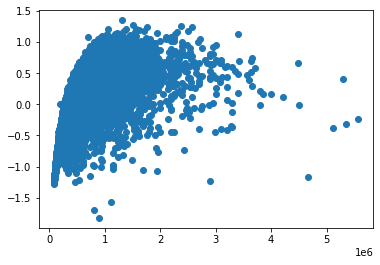

In [368]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

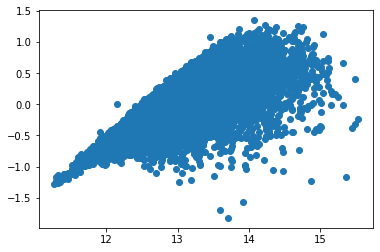

In [369]:
model2 = sm.OLS(endog=y_log, exog=x_c2).fit()
model2_preds = model2.predict(x_c2)
model2_resid = y_log - model2_preds

fig, ax = plt.subplots()
ax.scatter(y_log, model2_resid);

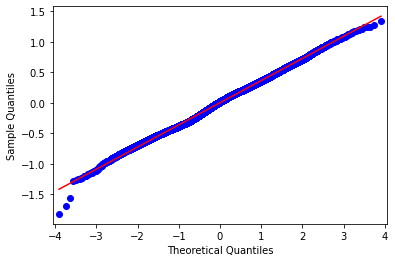

In [370]:
sm.qqplot(model2_resid, line='r');

### Combine

below we continued adding features to our model looking for a higher r-squared value while trying to keep the 
condition number low.

First we drop column already used, and keep mosly categorical data.

In [380]:
df2 = df.drop(labels=["id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","view"],axis=1)

In [381]:
dummy_df = pd.get_dummies(df2)

In [382]:
dummy_df.drop(labels=["waterfront_NO","condition_Average","grade_7 Average"],axis=1,inplace=True)

 `waterfront_NO`,`condition_Average`,`grade_7 Average` will be our reference categories.

In [383]:
x_c_comb = dummy_df.join(x_c2)

In [384]:
sm.OLS(y_log, x_c_comb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1598.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:20:30   Log-Likelihood:                -5215.7
No. Observations:               21416   AIC:                         1.048e+04
Df Residuals:                   21390   BIC:                         1.069e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
floors                  0.0767      0.005     15.380      0.000       0.067       0.086
yr_built               -0.0058   9.75e-05    -59.699      0.000      -0.006      -0.006
waterfront_YES          0.3076      0.032      9.741      0.000       0.246       0.370
condition_Fair         -0.1652      0.025     -6.690      0.000      -0.214      -0.117
condition_Good          0.0164      0.005      3.122      0.002       0.006       0.027
condition_Poor         -0.1347      0.059     -2.288      0.022      -0.250      -0.019
condition_Very Good     0.0825      0.008      9.748      0.000       0.066       0.099
grade_10 Very Good      0.6208      0.012     49.820      0.000       0.596       0.645
grade_11 Excellent      0.7367      0.019     37.974      0.000       0.699       0.775
grade_12 Luxury         0.8471      0.037     23.073      0.000       0.775       0.919
grade_13 Mansion        0.8876      0.096      9.285      0.000       0.700       1.075
grade_3 Poor           -0.4293      0.309     -1.389      0.165      -1.035       0.177
grade_4 Low            -0.5868      0.060     -9.797      0.000      -0.704      -0.469
grade_5 Fair           -0.4936      0.021    -23.596      0.000      -0.535      -0.453
grade_6 Low Average    -0.2734      0.008    -33.593      0.000      -0.289      -0.257
grade_8 Good            0.2326      0.006     39.926      0.000       0.221       0.244
grade_9 Better          0.4632      0.009     53.298      0.000       0.446       0.480
const                  24.2484      0.191    126.724      0.000      23.873      24.623
bedrooms               -0.0306      0.003    -10.856      0.000      -0.036      -0.025
bathrooms               0.0621      0.004     16.317      0.000       0.055       0.070
sqft_living             0.1702      0.005     37.665      0.000       0.161       0.179
sqft_lot               -0.0013      0.002     -0.593      0.553      -0.006       0.003
Fair_view               0.1780      0.017     10.279      0.000       0.144       0.212
Average_view            0.0948      0.010      9.054      0.000       0.074       0.115
Good_view               0.1318      0.014      9.211      0.000       0.104       0.160
Excellent_view          0.2661      0.022     12.120      0.000       0.223       0.309
==============================================================================
Omnibus:                       76.977   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.235
Skew:                          -0.088   Prob(JB):                     2.55e-20
Kurtosis:                       3.265   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

The high conditional number isn't ideal,  let's see if we can identify what's causing it by dropping a suspicious column. Year built is the most continuous variable that hasn't been scaled, so let's try dropping it as a test.

In [385]:
test = x_c_comb.drop(labels="yr_built",axis=1)

In [386]:
sm.OLS(y_log, test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1300.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:20:58   Log-Likelihood:                -6865.9
No. Observations:               21416   AIC:                         1.378e+04
Df Residuals:                   21391   BIC:                         1.398e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
floors                  0.0218      0.005      4.116      0.000       0.011       0.032
waterfront_YES          0.3305      0.034      9.691      0.000       0.264       0.397
condition_Fair         -0.1010      0.027     -3.791      0.000      -0.153      -0.049
condition_Good          0.0804      0.006     14.475      0.000       0.069       0.091
condition_Poor         -0.0116      0.064     -0.183      0.855      -0.136       0.113
condition_Very Good     0.2187      0.009     24.838      0.000       0.201       0.236
grade_10 Very Good      0.5519      0.013     41.186      0.000       0.526       0.578
grade_11 Excellent      0.6652      0.021     31.808      0.000       0.624       0.706
grade_12 Luxury         0.7776      0.040     19.619      0.000       0.700       0.855
grade_13 Mansion        0.8966      0.103      8.684      0.000       0.694       1.099
grade_3 Poor           -0.3213      0.334     -0.963      0.336      -0.976       0.333
grade_4 Low            -0.4787      0.065     -7.403      0.000      -0.605      -0.352
grade_5 Fair           -0.3866      0.023    -17.172      0.000      -0.431      -0.342
grade_6 Low Average    -0.1969      0.009    -22.683      0.000      -0.214      -0.180
grade_8 Good            0.1900      0.006     30.423      0.000       0.178       0.202
grade_9 Better          0.3907      0.009     42.042      0.000       0.373       0.409
const                  12.8355      0.009   1451.825      0.000      12.818      12.853
bedrooms               -0.0179      0.003     -5.915      0.000      -0.024      -0.012
bathrooms              -0.0056      0.004     -1.415      0.157      -0.013       0.002
sqft_living             0.1958      0.005     40.301      0.000       0.186       0.205
sqft_lot               -0.0080      0.002     -3.438      0.001      -0.013      -0.003
Fair_view               0.2396      0.019     12.832      0.000       0.203       0.276
Average_view            0.1638      0.011     14.565      0.000       0.142       0.186
Good_view               0.2108      0.015     13.697      0.000       0.181       0.241
Excellent_view          0.3418      0.024     14.436      0.000       0.295       0.388
==============================================================================
Omnibus:                       15.566   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.837
Skew:                           0.043   Prob(JB):                     0.000600
Kurtosis:                       2.903   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That dropped our conditional number dramatically! 

<br>

Let's scale the year built column and add it back in.

In [387]:
yr_scaled = (x_c_comb["yr_built"] - np.mean(x_c_comb["yr_built"])) / np.std(x_c_comb["yr_built"])
yr_scaled_df = pd.DataFrame(yr_scaled, index=x_c_comb["yr_built"].index)

In [388]:
x_c_comb2 = test.merge(yr_scaled_df,left_index=True, right_index=True)

# Results

In [389]:
sm.OLS(y_log, x_c_comb2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1598.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:29:51   Log-Likelihood:                -5215.7
No. Observations:               21416   AIC:                         1.048e+04
Df Residuals:                   21390   BIC:                         1.069e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
floors                  0.0767      0.005     15.380      0.000       0.067       0.086
waterfront_YES          0.3076      0.032      9.741      0.000       0.246       0.370
condition_Fair         -0.1652      0.025     -6.690      0.000      -0.214      -0.117
condition_Good          0.0164      0.005      3.122      0.002       0.006       0.027
condition_Poor         -0.1347      0.059     -2.288      0.022      -0.250      -0.019
condition_Very Good     0.0825      0.008      9.748      0.000       0.066       0.099
grade_10 Very Good      0.6208      0.012     49.820      0.000       0.596       0.645
grade_11 Excellent      0.7367      0.019     37.974      0.000       0.699       0.775
grade_12 Luxury         0.8471      0.037     23.073      0.000       0.775       0.919
grade_13 Mansion        0.8876      0.096      9.285      0.000       0.700       1.075
grade_3 Poor           -0.4293      0.309     -1.389      0.165      -1.035       0.177
grade_4 Low            -0.5868      0.060     -9.797      0.000      -0.704      -0.469
grade_5 Fair           -0.4936      0.021    -23.596      0.000      -0.535      -0.453
grade_6 Low Average    -0.2734      0.008    -33.593      0.000      -0.289      -0.257
grade_8 Good            0.2326      0.006     39.926      0.000       0.221       0.244
grade_9 Better          0.4632      0.009     53.298      0.000       0.446       0.480
const                  12.7711      0.008   1546.860      0.000      12.755      12.787
bedrooms               -0.0306      0.003    -10.856      0.000      -0.036      -0.025
bathrooms               0.0621      0.004     16.317      0.000       0.055       0.070
sqft_living             0.1702      0.005     37.665      0.000       0.161       0.179
sqft_lot               -0.0013      0.002     -0.593      0.553      -0.006       0.003
Fair_view               0.1780      0.017     10.279      0.000       0.144       0.212
Average_view            0.0948      0.010      9.054      0.000       0.074       0.115
Good_view               0.1318      0.014      9.211      0.000       0.104       0.160
Excellent_view          0.2661      0.022     12.120      0.000       0.223       0.309
yr_built               -0.1711      0.003    -59.699      0.000      -0.177      -0.165
==============================================================================
Omnibus:                       76.977   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.235
Skew:                          -0.088   Prob(JB):                     2.55e-20
Kurtosis:                       3.265   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [390]:
print(f"Square Foot of Living Space std: {df['sqft_living'].std()}")
print(f"Square Foot of Lot std: {df['sqft_lot'].std()}")
print(f"Year built std: {df['yr_built'].std()}")
print(f"Bedroom std: {df['bedrooms'].std()}")
print(f"Bathroom std: {df['bathrooms'].std()}")

Square Foot of Living Space std: 909.8313422627067
Square Foot of Lot std: 41485.99593490933
Year built std: 29.38482213551832
Bedroom std: 0.900816715043869
Bathroom std: 0.7655477606080567


# Conclusions

Our model suggests the most impactful features to predict house prices within king county are waterfront, size of living area, the construction quality and view. We found that year built and bedrooms do not have a as much of an impact as it could be expected.

Some key points to mention are:

- Adding a floor ups the price by 7.6%

- Being waterfront increases the price by 30%

- Adding a 3/4 bathroom increases price by 6%

- Adding 909 square feet to living area increases price by 17%

- Having a view can increase the price from 17 to 26%

- A home in poor condition can be nearly 13% cheaper, while a very good home can be 8% more expensive

- Construction quality has a massive impact; below-average homes sell 26 to 42% cheaper than average homes, while more luxury homes sell for as much as 88% more

- Year built, square footage of the lot, and number of bedrooms do not have significant impacts.